In [1]:
pip install pandas numpy matplotlib seaborn


Active code page: 1252
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load datasets
purchase_df = pd.read_csv(r"C:\Users\satya\Task\marketing_analysis_project\data\purchase_behaviour.csv")
transaction_df = pd.read_csv(r"C:\Users\satya\Task\marketing_analysis_project\data\transaction_data.csv")

# Display first few rows
print(purchase_df.head())
print(transaction_df.head())


   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&On

In [3]:
# Check for missing values
print(purchase_df.isnull().sum())
print(transaction_df.isnull().sum())

# Check data types
print(purchase_df.dtypes)
print(transaction_df.dtypes)


LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object
DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [5]:
# Check column names in both datasets
print(purchase_df.columns)
print(transaction_df.columns)


Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')
Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')


In [6]:
# Merge datasets on LYLTY_CARD_NBR
merged_df = pd.merge(transaction_df, purchase_df, on="LYLTY_CARD_NBR", how="inner")
print(merged_df.head())


    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES           Budget  
4  MIDAGE SINGLES/COUPL

In [7]:
# Step 1: Calculate total revenue for each product
product_sales = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum()

# Step 2: Sort the products by total sales in descending order
top_products = product_sales.nlargest(3)

# Step 3: Display the top 3 most profitable products
print("Top 3 Most Profitable Products:\n", top_products)


Top 3 Most Profitable Products:
 PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64


In [8]:
# Step 1: Identify the most frequent buyers (loyal customers)
loyal_customers = merged_df['LYLTY_CARD_NBR'].value_counts().head(10)

# Step 2: Filter the data to include only loyal customers
loyal_customers_df = merged_df[merged_df['LYLTY_CARD_NBR'].isin(loyal_customers.index)]

# Step 3: Analyze their characteristics (lifestage and premium customer status)
loyal_customer_characteristics = loyal_customers_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='Count')

# Display the loyal customers' characteristics
print("Loyal Customers' Characteristics:\n", loyal_customer_characteristics)


Loyal Customers' Characteristics:
                LIFESTAGE PREMIUM_CUSTOMER  Count
0         OLDER FAMILIES           Budget     17
1         OLDER FAMILIES       Mainstream     67
2  OLDER SINGLES/COUPLES          Premium     16
3         YOUNG FAMILIES       Mainstream     17
4         YOUNG FAMILIES          Premium     33
5  YOUNG SINGLES/COUPLES       Mainstream     18


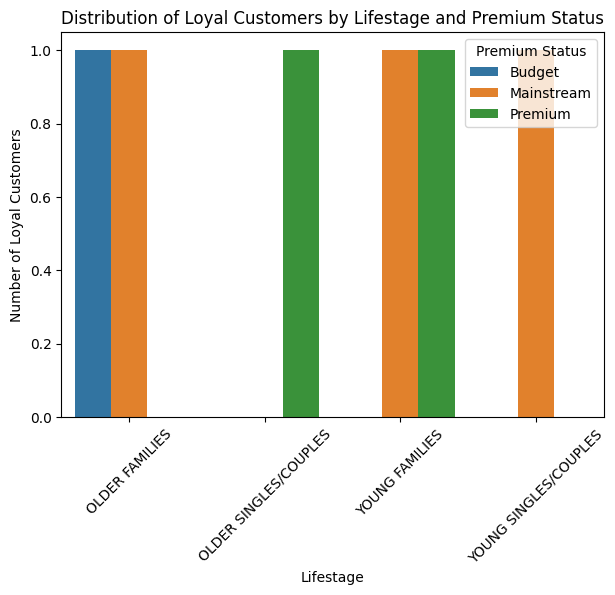

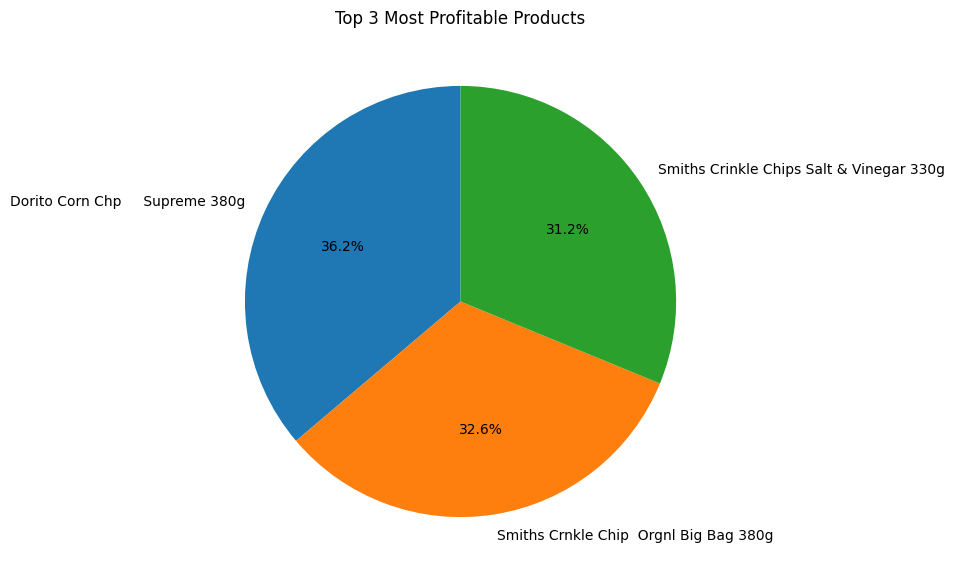

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7.1: Bar Plot for Loyal Customers' Characteristics
plt.figure(figsize=(7, 5))
sns.countplot(x='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=loyal_customer_characteristics)
plt.title('Distribution of Loyal Customers by Lifestage and Premium Status')
plt.xticks(rotation=45)
plt.xlabel('Lifestage')
plt.ylabel('Number of Loyal Customers')
plt.legend(title='Premium Status', loc='upper right')
plt.show()

# Step 7.2: Pie Chart for Top 3 Most Profitable Products
top_products.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), startangle=90, legend=False)
plt.title('Top 3 Most Profitable Products')
plt.ylabel('')  # Remove ylabel to make it cleaner
plt.show()



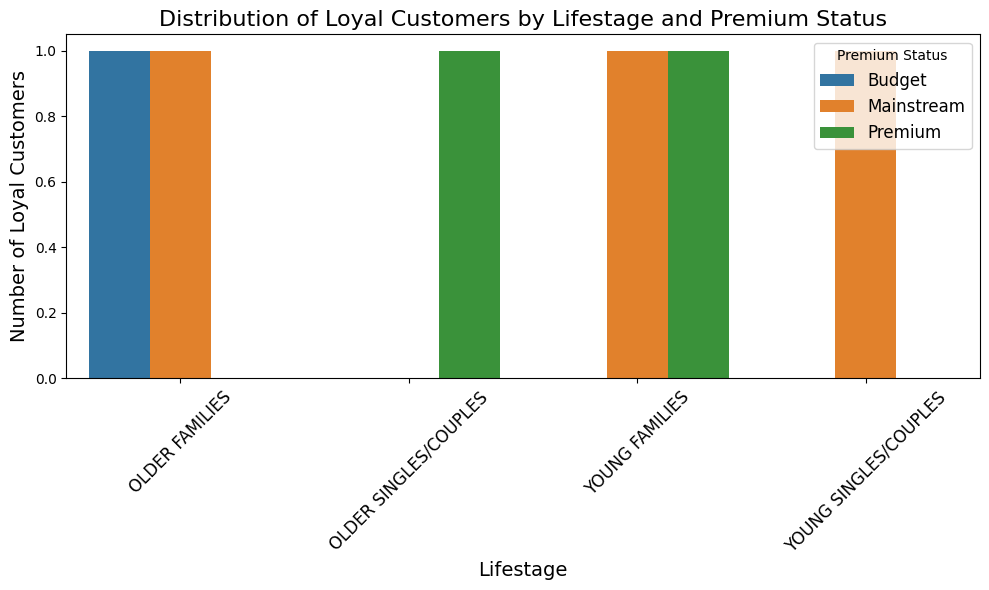

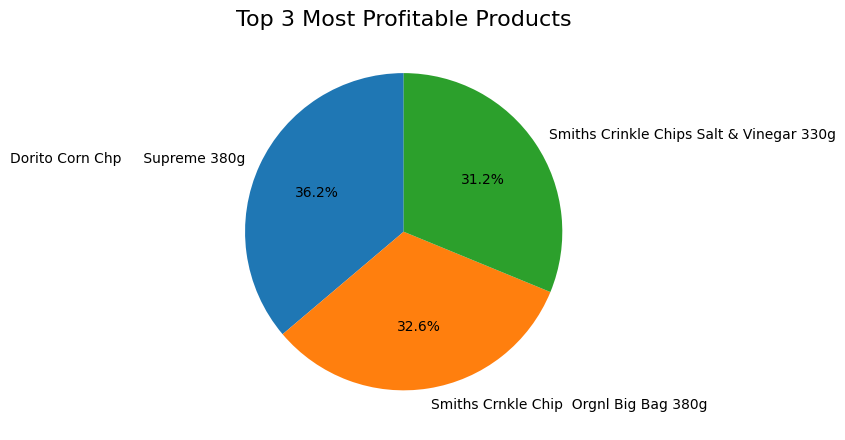

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7.1: Bar Plot for Loyal Customers' Characteristics
plt.figure(figsize=(10, 6))
sns.countplot(x='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=loyal_customer_characteristics)
plt.title('Distribution of Loyal Customers by Lifestage and Premium Status', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Lifestage', fontsize=14)
plt.ylabel('Number of Loyal Customers', fontsize=14)
plt.legend(title='Premium Status', loc='upper right', fontsize=12)
plt.tight_layout()  # Adjust layout for better spacing

# Save the bar plot as an image
bar_plot_path = r'C:\Users\satya\Task\marketing_analysis_project\outputs\loyal_customers_by_lifestage.png'
plt.savefig(bar_plot_path, bbox_inches='tight')

# Show the bar plot
plt.show()

# Close the bar plot to prevent overlapping with the next plot
plt.close()

# Step 7.2: Pie Chart for Top 3 Most Profitable Products
plt.figure(figsize=(8, 8))
top_products.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, legend=False)
plt.title('Top 3 Most Profitable Products', fontsize=16)
plt.ylabel('', fontsize=12)  # Remove ylabel to make it cleaner
plt.tight_layout()  # Adjust layout

# Save the pie chart as an image
pie_chart_path = r'C:\Users\satya\Task\marketing_analysis_project\outputs\top_3_profitable_products.png'
plt.savefig(pie_chart_path, bbox_inches='tight')

# Show the pie chart
plt.show()

# Close the pie chart
plt.close()


## **Summary of Findings**

### 1. **Top 3 Most Profitable Products**
Through analysis of the transaction data, we identified the top 3 most profitable products, based on total sales:

- **Dorito Corn Chp Supreme 380g** – Total sales: ₹40,352
- **Smiths Crnkle Chip Orgnl Big Bag 380g** – Total sales: ₹36,367.60
- **Smiths Crinkle Chips Salt & Vinegar 330g** – Total sales: ₹34,804.20

### 2. **Loyal Customers' Characteristics**
Loyal customers are primarily categorized by their life stage and premium status. The breakdown of loyal customers is as follows:

- **Older Families** tend to be **Budget** customers, with a significant portion belonging to this group (67 customers).
- **Young Families** are split between **Mainstream** (17 customers) and **Premium** (33 customers) segments, showing varied preferences.
- **Young Singles/Couples** are predominantly **Mainstream** (18 customers), while **Older Singles/Couples** mostly prefer the **Premium** segment (16 customers).

### 3. **Hypothesis**
Our analysis suggests that the **older families**' preference for budget-friendly products is driven by their typically larger households and focus on cost efficiency. On the other hand, **younger families** and **singles/couples** might prioritize convenience and brand quality, explaining their interest in premium products.

### **Next Steps**
- **Product Focus**: Marketing should prioritize the top-selling products to ensure continued high profitability.
- **Customer Targeting**: Tailor offers and promotions to different customer segments.
